Shape of Dataset: (1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 


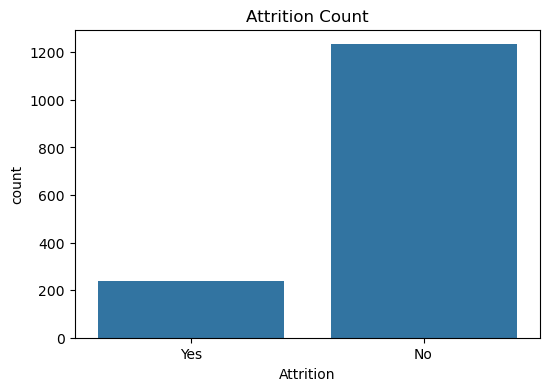

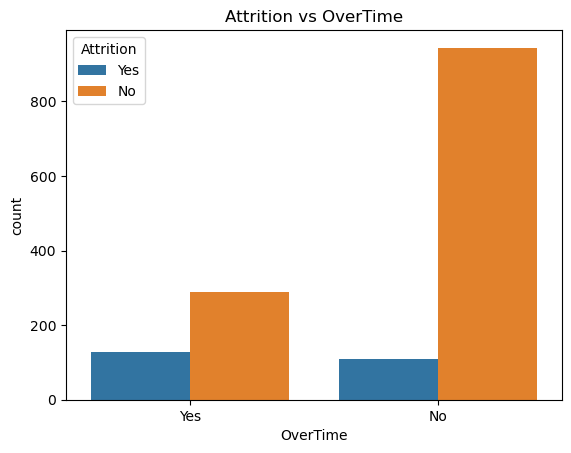

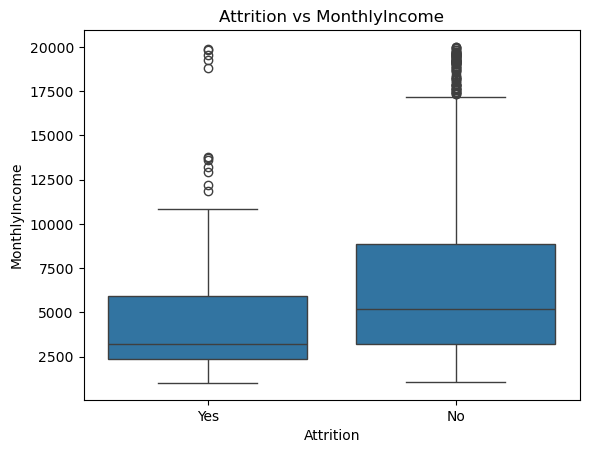

=== Logistic Regression Report ===
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.70      0.36      0.47        39

    accuracy                           0.89       294
   macro avg       0.80      0.67      0.71       294
weighted avg       0.88      0.89      0.88       294

=== Random Forest Report ===
              precision    recall  f1-score   support

           0       0.88      1.00      0.94       255
           1       0.83      0.13      0.22        39

    accuracy                           0.88       294
   macro avg       0.86      0.56      0.58       294
weighted avg       0.88      0.88      0.84       294



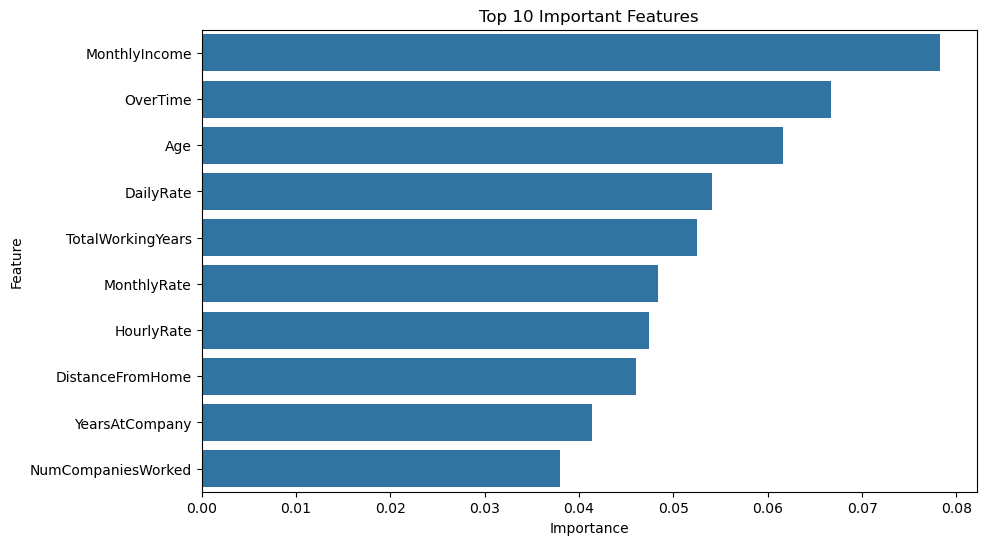

🔍 Insights for HR Retention Strategies:

1. OverTime is highly correlated with attrition — consider flexible work hours or overtime pay adjustments.
2. MonthlyIncome and JobLevel matter — review salary structures to retain experienced employees.
3. DistanceFromHome — consider remote/hybrid work options for long-distance employees.
4. JobSatisfaction and EnvironmentSatisfaction — conduct surveys and act on employee feedback.



In [1]:
# Employee Attrition Prediction using IBM Dataset

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Optional: To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Step 2: Load Dataset
df = pd.read_csv("Employe_Data.csv")  # Replace with your path

# Step 3: Initial Exploration
print("Shape of Dataset:", df.shape)
print(df.info())
print(df['Attrition'].value_counts())

# Step 4: Visual EDA
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Attrition')
plt.title("Attrition Count")
plt.show()

# Check relation with OverTime
sns.countplot(data=df, x='OverTime', hue='Attrition')
plt.title("Attrition vs OverTime")
plt.show()

# Boxplot for numeric factor
sns.boxplot(data=df, x='Attrition', y='MonthlyIncome')
plt.title("Attrition vs MonthlyIncome")
plt.show()

# Step 5: Data Preprocessing
df.drop(['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18'], axis=1, inplace=True)

# Encode Categorical Features
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Step 6: Train-Test Split
X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 7: Train Models

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_preds = lr_model.predict(X_test_scaled)

print("=== Logistic Regression Report ===")
print(classification_report(y_test, lr_preds))

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

print("=== Random Forest Report ===")
print(classification_report(y_test, rf_preds))

# Step 8: Feature Importance (Random Forest)
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(10,6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature')
plt.title("Top 10 Important Features")
plt.show()

# Step 9: Retention Strategy Insights
print("🔍 Insights for HR Retention Strategies:")
print("""
1. OverTime is highly correlated with attrition — consider flexible work hours or overtime pay adjustments.
2. MonthlyIncome and JobLevel matter — review salary structures to retain experienced employees.
3. DistanceFromHome — consider remote/hybrid work options for long-distance employees.
4. JobSatisfaction and EnvironmentSatisfaction — conduct surveys and act on employee feedback.
""")


In [5]:
# Task 1: Predict Employee Attrition

# -----------------------
# Step 1: Import Libraries
# -----------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

import shap  # SHAP for explainability
import warnings
warnings.filterwarnings('ignore')

# -----------------------
# Step 2: Load Dataset
# -----------------------
df = pd.read_csv("Employe_Data.csv")  # Replace with your file path

# -----------------------
# Step 3: Exploratory Data Analysis (EDA)
# -----------------------
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nAttrition Distribution:\n", df['Attrition'].value_counts())

# Visualize Attrition
sns.countplot(x='Attrition', data=df)
plt.title("Employee Attrition Count")
plt.show()

# Attrition by Overtime
sns.countplot(x='OverTime', hue='Attrition', data=df)
plt.title("Attrition vs OverTime")
plt.show()

# MonthlyIncome vs Attrition
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title("Attrition vs Monthly Income")
plt.show()

# -----------------------
# Step 4: Data Preprocessing
# -----------------------

# Drop irrelevant columns
cols_to_drop = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# Encode categorical variables
label_enc = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label_enc.fit_transform(df[col])

# Features and Target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -----------------------
# Step 5: Train Classification Models
# -----------------------

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
lr_preds = lr.predict(X_test_scaled)

print("\n📊 Logistic Regression Report")
print(classification_report(y_test, lr_preds))

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

print("\n🌲 Random Forest Report")
print(classification_report(y_test, rf_preds))

# -----------------------
# Step 6: SHAP Explainability
# -----------------------

# Use TreeExplainer for Random Forest
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)

# Global Feature Importance
shap.summary_plot(shap_values[1], X, plot_type="bar", show=True)

# SHAP Summary (detailed)
shap.summary_plot(shap_values[1], X)

# -----------------------
# Step 7: Actionable HR Insights
# -----------------------
print("\n💡 Actionable Insights for HR Retention:")
print("""
1. Overtime is a strong indicator — limit excessive overtime and promote work-life balance.
2. Employees with low MonthlyIncome show higher attrition — consider compensation reviews.
3. Long DistanceFromHome increases attrition — offer remote/hybrid work options.
4. Environment and JobSatisfaction are critical — run frequent pulse surveys and feedback loops.
5. Younger employees (Age < 30) are more likely to leave — consider career growth programs.
""")


ModuleNotFoundError: No module named 'shap'

In [3]:
pip install shap

   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/545.2 kB ? eta -:--:--
   ---

ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\T H I N K P A D\\AppData\\Local\\Temp\\pip-unpack-tsx9coxy\\llvmlite-0.44.0-cp312-cp312-win_amd64.whl'
Consider using the `--user` option or check the permissions.

